## РК1 ТМО
### ИУ5-65Б Большаков Г.Н.
### Вариант 3

Задача №1.
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

Для студентов группы ИУ5-65Б, ИУ5И-65Б - для набора данных построить "парные диаграммы".

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv("./toy_dataset.csv", sep=',')

In [3]:
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [4]:
# Пропусков в данных нет
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


In [5]:
data.describe()

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


In [6]:
data.drop(columns="Number", axis=1, inplace=True)
data.head()

,City,Gender,Age,Income,Illness
0,Dallas,Male,41,40367.0,No
1,Dallas,Male,54,45084.0,No
2,Dallas,Male,42,52483.0,No
3,Dallas,Male,40,40941.0,No
4,Dallas,Male,46,50289.0,No


In [7]:
data["City"].unique()

array(['Dallas', 'New York City', 'Los Angeles', 'Mountain View',
       'Boston', 'Washington D.C.', 'San Diego', 'Austin'], dtype=object)

In [8]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data[["City", "Gender", "Illness"]])
cat_enc_oe

array([[2., 1., 0.],
       [2., 1., 0.],
       [2., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [9]:
data_enc = pd.DataFrame(data=cat_enc_oe, index=data.index, columns=["City", "Gender", "Illness"])
data_enc.head()

,City,Gender,Illness
0,2.0,1.0,0.0
1,2.0,1.0,0.0
2,2.0,1.0,0.0
3,2.0,1.0,0.0
4,2.0,1.0,0.0


In [10]:
data_enc["City"].unique()

array([2., 5., 3., 4., 1., 7., 6., 0.])

In [11]:
data_enc = data_enc.join(data[["Age"]])
data_enc = data_enc.join(data[["Income"]])

data_enc

,City,Gender,Illness,Age,Income
0,2.0,1.0,0.0,41,40367.0
1,2.0,1.0,0.0,54,45084.0
2,2.0,1.0,0.0,42,52483.0
3,2.0,1.0,0.0,40,40941.0
4,2.0,1.0,0.0,46,50289.0
...,...,...,...,...,...
149995,0.0,1.0,0.0,48,93669.0
149996,0.0,1.0,0.0,25,96748.0
149997,0.0,1.0,0.0,26,111885.0
149998,0.0,1.0,0.0,25,111878.0


In [12]:
corr_matrix = data_enc.corr()

In [13]:
corr_matrix

,City,Gender,Illness,Age,Income
City,1.000000,0.002188,-0.001712,-0.000636,0.234541
Gender,0.002188,1.000000,0.001297,-0.003653,0.198888
Illness,-0.001712,0.001297,1.000000,0.001811,0.000298
Age,-0.000636,-0.003653,0.001811,1.000000,-0.001318
Income,0.234541,0.198888,0.000298,-0.001318,1.000000


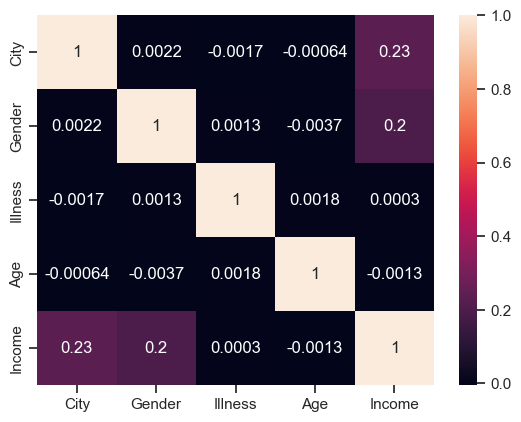

In [14]:
heatmap = sns.heatmap(corr_matrix, annot=True)

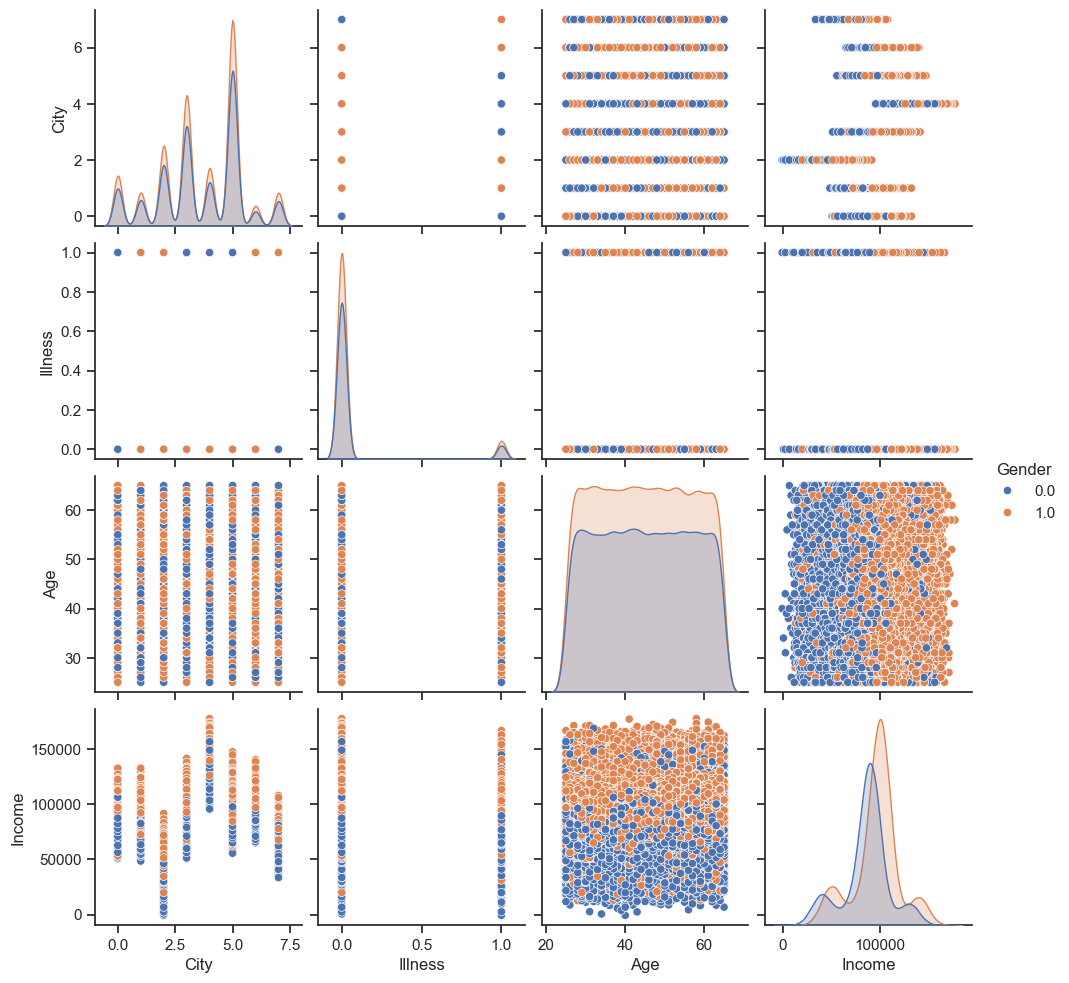

In [15]:
pair_plot = sns.pairplot(data_enc, hue="Gender")
plt.show()

На основании корреляционного анализа можно сделать выводы:
- Корреляция между признаками почти отсутствует
- Можно выделить только влияние Gender и Age на Income
- Скорее всего придется создавать новые признаки на основе имеющихся